In [3]:
%gui qt5
%matplotlib qt5
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x, y, beta, theta = sp.symbols('x y beta theta', real=True)
r, eps, alp = sp.symbols('r epsilon alpha', real=True, positive=True)
R0 = 12
angant = 6/R0

# Integration in polar coordinates

In [5]:
A = (1-r*r)*sp.Integral(1/(1+r*r-2*r*sp.cos(alp-theta)), (alp, beta-alp/2, beta+alp/2))
A = A.subs(r, sp.exp(-r))
A = A.doit()
A = A.subs(r, sp.log(r)).simplify()
A = sp.expand_trig(A)
A

2*atan((r + 1)*(tan(alpha/4)*tan(beta/2)*tan(theta/2) + tan(alpha/4) + tan(beta/2) - tan(theta/2))/((r - 1)*(-tan(alpha/4)*tan(beta/2) + tan(alpha/4)*tan(theta/2) + tan(beta/2)*tan(theta/2) + 1))) + 2*atan((r + 1)*(tan(alpha/4)*tan(beta/2)*tan(theta/2) + tan(alpha/4) - tan(beta/2) + tan(theta/2))/((r - 1)*(tan(alpha/4)*tan(beta/2) - tan(alpha/4)*tan(theta/2) + tan(beta/2)*tan(theta/2) + 1))) - 2*pi*floor((-alpha + 2*beta - 2*theta - 2*pi)/(4*pi))*sign(1/(r - 1)) + 2*pi*floor((alpha + 2*beta - 2*theta - 2*pi)/(4*pi))*sign(1/(r - 1))

In [6]:
SE = A.subs(beta, 1*sp.pi/4).subs(alp, angant)
SD = A.subs(beta, 3*sp.pi/4).subs(alp, angant)
LD = A.subs(beta, 5*sp.pi/4).subs(alp, angant)
LE = A.subs(beta, 7*sp.pi/4).subs(alp, angant)
S1 = SE + LD
S2 = LE + SD
D1 = SE - LD
D2 = LE - SD
XP = (D1/S1 + D2/S2)/2 # /sp.sqrt(2)/sp.sin(angant)*angant
YP = (D1/S1 - D2/S2)/2 # /sp.sqrt(2)/sp.sin(angant)*angant

In [7]:
lambXP = sp.lambdify((r, theta), XP, modules='numpy')
lambYP = sp.lambdify((r, theta), YP, modules='numpy')

In [8]:
0.8*12

9.600000000000001

In [9]:
# rr = np.random.rand(10000)*1
# th = -np.random.rand(10000)*np.pi/2*0
rr = np.linspace(1e-9, 1-1e-9, 10000)
th = rr*0
xp = rr * np.cos(th)
yp = rr * np.sin(th)
npxp = lambXP(rr, th)
npyp = lambYP(rr, th)

In [10]:
coef = np.polynomial.polynomial.polyfit(xp, npxp, deg=[1,3,5,7,9])
polr = np.polynomial.polynomial.Polynomial(coef)
npxf = polr(xp)

In [11]:
coef*R0/2

array([ 0.        ,  8.38862923,  0.        , -7.51105034,  0.        ,
        6.31750048,  0.        , -4.01180625,  0.        ,  1.19772782])

In [12]:
f = plt.figure()
plt.plot(xp, npxp, '.', label='Exact')
plt.plot(xp, npxf, '.', label='Fit')
plt.legend()
plt.grid()
f.show()

# Integration in xy-coordinates

In [13]:
r = sp.sqrt(x*x + y*y)
order = 10

In [14]:
A = (1-r*r)*sp.Integral(1/(1+r*r-2*x*sp.cos(alp)-2*y*sp.sin(alp)), alp)
A

(-x**2 - y**2 + 1)*Integral(1/(x**2 - 2*x*cos(alpha) + y**2 - 2*y*sin(alpha) + 1), alpha)

In [15]:
B = A.subs(x, x*eps).subs(y, y*eps).series(eps, n=order).removeO()
B = sp.collect(B, eps)

In [16]:
C = B.subs(alp, beta+angant/2) - B.subs(alp, beta-angant/2)
C = sp.expand_trig(C).collect(eps)
# C = C.simplify()

In [17]:
SE = sp.expand_trig(C.subs(beta, 1*sp.pi/4)).simplify()
SD = sp.expand_trig(C.subs(beta, 3*sp.pi/4)).simplify()
LD = sp.expand_trig(C.subs(beta, 5*sp.pi/4)).simplify()
LE = sp.expand_trig(C.subs(beta, 7*sp.pi/4)).simplify()

In [18]:
S1 = SE + LD
S2 = LE + SD

In [19]:
D1 = SE - LD
D2 = LE - SD
D1 = sp.simplify(D1)
D2 = sp.simplify(D2)

In [20]:
XR = (D1/S1 + D2/S2)/2 # /sp.sqrt(2)/sp.sin(angant)*angant
YR = (D1/S1 - D2/S2)/2 # /sp.sqrt(2)/sp.sin(angant)*angant
XR = XR.series(eps, n=order).removeO()
YR = YR.series(eps, n=order).removeO()
XR = XR.subs(eps, 1).collect(x).collect(y)
YR = YR.subs(eps, 1).collect(x).collect(y)

In [21]:
xr = np.linspace(0, 1, 10000)
yr = xr*0 
lambXR = sp.lambdify((x, y), XR, modules='numpy')
lambYR = sp.lambdify((x, y), YR, modules='numpy')
npxr = lambXR(xr, yr)
npyr = lambYR(xr, yr)

In [22]:
f = plt.figure()
plt.plot(xr, npxr, '.')
plt.grid()
f.show()

# Daniel's Formula

In [23]:
def calc_pos(x, y):
    d = np.sqrt(x*x + y*y)[:, None]
    theta = np.arctan2(y, x)[:, None]
    phi = np.array([1, 3, 5, 7])*np.pi/4
    phi = phi[None, :]

    d2 = d*d
    Q = np.arctan2((1-d2)*np.sin(angant/2), (1+d2)*np.cos(angant/2) - 2*d*np.cos(theta - phi))
    SE = Q[:,0]
    SD = Q[:,1]
    LD = Q[:,2]
    LE = Q[:,3]
    S1 = SE + LD
    S2 = LE + SD
    D1 = SE - LD
    D2 = LE - SD
    XR = (D1/S1 + D2/S2)/2 # /np.sqrt(2)/np.sin(nplenant)*nplenant
    YR = (D1/S1 - D2/S2)/2 # /np.sqrt(2)/np.sin(nplenant)*nplenant
    return XR, YR

In [24]:
xd = np.linspace(1e-9, 1, 10000)
yd = xd*0 
npxd, npyd = calc_pos(xd, yd)

/home/fernando/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/home/fernando/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [25]:
f = plt.figure()
plt.plot(xd, npxd, '.')
plt.grid()
f.show()

# Comparison

In [26]:
f = plt.figure()
plt.plot(xp, npxp, '.', label='exact')
plt.plot(xp, npxf, '.', label='fit')
plt.plot(xr, npxr, '.', label='expand 9th')
plt.plot(xd, npxd, 'x', label='Daniel')
plt.xlabel(r'$x/R$ real')
plt.ylabel(r'$x/R$ estimated')
plt.legend()
plt.grid()
f.show()

# Inverse problem

In [27]:
def plot2d(x, y, z, coeff):
    # regular grid covering the domain of the data
    if x.size > 500:
        choice = np.random.choice(x.size, size=500, replace=False)
    else:
        choice = slice(None, None, None)
    x, y, z = x[choice], y[choice], z[choice]
    X, Y = np.meshgrid(
        np.linspace(np.min(x), np.max(x), 20), np.linspace(np.min(y), np.max(y), 20)
    )
    Z = np.polynomial.polynomial.polyval2d(X, Y, coeff)
    fig = plt.figure()
    ax = fig.gca(projection="3d")
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
    ax.scatter(x, y, z, c="r", s=50)
    plt.xlabel("X")
    plt.ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()


def polyfit2d(x, y, z, degreex=1, degreey=1, max_degree=None):
    """A simple 2D polynomial fit to data x, y, z
    The polynomial can be evaluated with numpy.polynomial.polynomial.polyval2d

    Parameters
    ----------
    x : array[n]
        x coordinates
    y : array[n]
        y coordinates
    z : array[n]
        data values
    degreex : {int, list}, optional
        degree of the polynomial fit in x direction (default: 1)
    degreey : {int, list}, optional
        degree of the polynomial fit in y direction (default: 1)
    max_degree : {int, None}, optional
        if given the maximum combined degree of the coefficients is limited to this value

    Returns
    -------
    coeff : array[degree+1, degree+1]
        the polynomial coefficients in numpy 2d format, i.e. coeff[i, j] for x**i * y**j
    """
    # Flatten input
    x = np.asarray(x).ravel()
    y = np.asarray(y).ravel()
    z = np.asarray(z).ravel()

    if np.isscalar(degreex):
        degreex = np.arange(degreex + 1)
    if np.isscalar(degreey):
        degreey = np.arange(degreey + 1)
    degy, degx = np.meshgrid(degy, degx)
    idx = np.array(list(zip(degx.flatten(), degy.flatten())))

    # Calculate elements 1, x, y, x*y, x**2, y**2, ...
    A = np.polynomial.polynomial.polyvander2d(x, y, (degreex, degreey))

    # We only want the combinations with maximum order COMBINED power
    if max_degree is not None:
        mask = idx[:, 0] + idx[:, 1] <= int(max_degree)
        idx = idx[mask]
        A = A[:, mask]

    # Do the actual least squares fit
    C, *_ = np.linalg.lstsq(A, z)

    # Reorder coefficients into numpy compatible 2d array
    coeff = np.zeros((np.max(degreex)+1, np.max(degreex)+1), dtype=float)
    for k, (i, j) in enumerate(idx):
        coeff[i, j] = C[k]

    if plot:
        plot2d(x, y, z, coeff)

    return coeff


In [28]:
coef_bpm = np.array([0, 8.57433e+06, 0, 4.01544e+06, 0, 3.94658e+06, 0, -1.1398e+06, 0, 2.43619e+07])/1e6
poly_bpm = np.polynomial.polynomial.Polynomial(coef_bpm)
bpm_xf = poly_bpm(npxp)

In [29]:
rev_coef = np.polynomial.polynomial.polyfit(npxp, xp*R0, deg=[1,3,5,7,9], rcond=None)
rev_polr = np.polynomial.polynomial.Polynomial(rev_coef)
rev_xf = rev_polr(npxp)

In [70]:
rev_coef2 = np.polynomial.polynomial.polyfit(npxp[:-1000], xp[:-1000]*R0, deg=[1,3,5,7, 9], rcond=None)
rev_polr2 = np.polynomial.polynomial.Polynomial(rev_coef2)
rev_xf2 = rev_polr2(npxp)

In [71]:
xp[-1000]*R0

10.80108009840864

In [72]:
cal_npxp = npxp * R0/np.sqrt(2)/np.sin(angant)*angant
f = plt.figure()
plt.plot(xp*R0, rev_xf - xp*R0, '.', label='fit up to 12mm')
plt.plot(xp*R0, rev_xf2 - xp*R0, '.', label='fit up to 10.8mm')
plt.plot(xp*R0, bpm_xf - xp*R0, '.', label='BPMs')
plt.ylabel(r'$x_\mathrm{Estimated} - x_\mathrm{Real}$[mm]')
plt.xlabel(r'$x_\mathrm{Real}$ [mm]')
plt.legend()
plt.grid()
f.show()

In [31]:
rev_coef*R0*2

array([  0.        ,   9.69189436,   0.        ,  -7.4975911 ,
         0.        ,  17.39126442,   0.        , -12.65670541,
         0.        ,   3.16829594])

# Polynom Inversion

In [353]:
def calc_inverse(x, poly, iorder=None):
    i, m = sp.symbols('i m', cls=sp.Idx)
    a = sp.IndexedBase('a')
    b = sp.IndexedBase('b')
    order = len(poly)-1
    iorder = iorder or order
    f = sp.summation(a[i]*x**(i+1), (i, 0, iorder))
    
    g = 0
    for l, c in enumerate(poly):
        g += c*x**(l+1)
    
    pol = sp.Poly(f.subs(x, g), x)
    coefs = []
    for cos in pol.coeffs():
        coef = []
        for j in range(0, iorder):
            co = sp.Poly(cos, a[j])
            if len(co.monoms()) > 1:
                coef.append(co.coeffs()[0])
            elif co.monoms()[0][0] == 1:
                coef.append(co.coeffs()[0])
            else:
                coef.append(0)
        coefs.append(coef)
    Matn = sp.Matrix(coefs)
    Matn = np.array(Matn, dtype=float)
    Matn *= 0.5**(np.arange(Matn.shape[0])[::-1][:, None])
    u, s, vh = np.linalg.svd(Matn, full_matrices=False)
    iMatn = vh.T@np.diag(1/s)@u.T

    sol = iMatn[:, -1]
    fn = 0
    for l, c in enumerate(sol):
        fn += c*x**(l+1)
    return g, fn


In [341]:
x = sp.symbols('x', real=True)
xn = np.linspace(0, 1, 1000)[1:]

In [356]:
FNs = []
for i in range(-1, 1):
    gn, fn = calc_inverse(x, poly, iorder=len(poly)-1+2*i)
    FNs.append(sp.lambdify(x, fn, 'numpy'))

GN = sp.lambdify(x, gn, 'numpy')
fit = np.poly1d(np.polyfit(GN(xn), xn, deg=len(poly)-1))

<IPython.core.display.Javascript object>


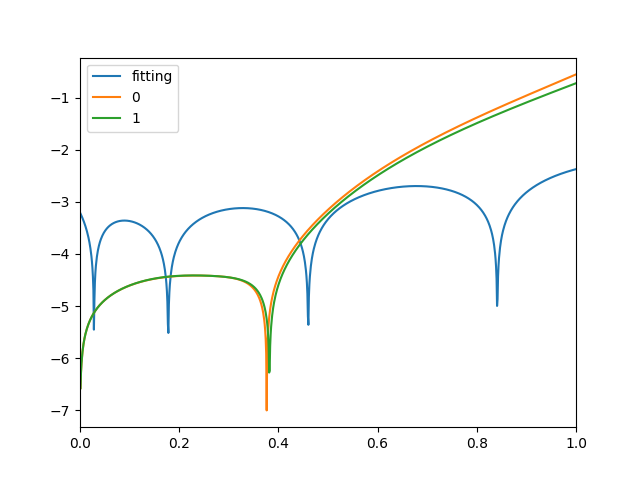

<IPython.core.display.Javascript object>


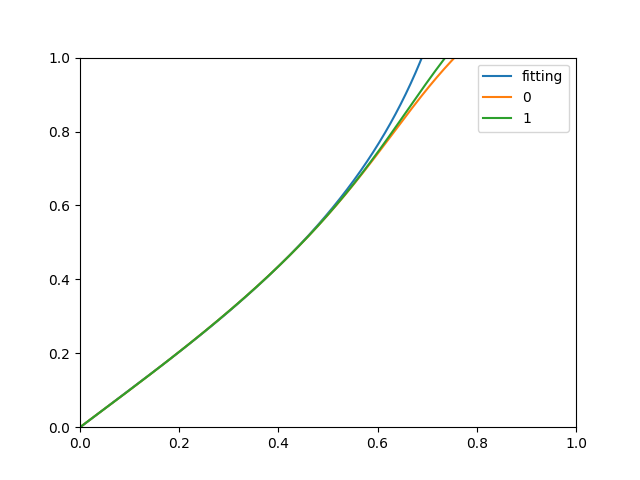

In [357]:
f = plt.figure()
plt.plot(xn, np.log10(np.abs(GN(fit(xn))-xn)), label='fitting')
for i, FN in enumerate(FNs):
    plt.plot(xn, np.log10(np.abs(GN(FN(xn))-xn)), label='{:d}'.format(i))
plt.legend()
plt.xlim([0, 1])

f = plt.figure()
# plt.plot(xn, GN(xn), label='G')
plt.plot(fit(xn), xn, label='fitting')
for i, FN in enumerate(FNs):
    plt.plot(FN(xn), xn, label='{:d}'.format(i))
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [292]:
i, j, m = sp.symbols('i j m', cls=sp.Idx)
a = sp.IndexedBase('a')
x, y, eps = sp.symbols('x y eps', real=True)
f = sp.summation(sp.summation(a[5*i + j]*x**(2*i+1)*y**(2*j), (j, 0, 4)), (i, 0, 4))
f = f.subs(x, x*eps).subs(y, y*eps).series(eps, n=10).removeO().subs(eps, 1).collect(x).collect(y)
f

x**9*a[20] + x**7*(y**2*a[16] + a[15]) + x**5*(y**4*a[12] + y**2*a[11] + a[10]) + x**3*(y**6*a[8] + y**4*a[7] + y**2*a[6] + a[5]) + x*(y**8*a[4] + y**6*a[3] + y**4*a[2] + y**2*a[1] + a[0])